# Análisis de nacimientos de bebés en USA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()  # Configurar los colores en los gráficos

In [3]:
%matplotlib inline

In [4]:
births = pd.read_csv('us-births.csv')

In [5]:
births.shape

(15547, 5)

In [6]:
births.sample(5)

,year,month,day,gender,births
1537,1971,1,1.0,M,4634
2390,1972,2,14.0,F,4827
3220,1973,3,16.0,M,4506
10387,1982,9,6.0,M,4790
13666,1987,2,5.0,M,5473


In [7]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [8]:
births['decade'] = ((births['year'] // 10) * 10).astype(str) + 's'

In [9]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s


In [10]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


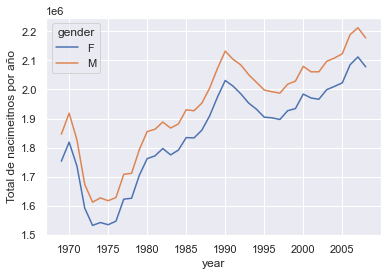

In [11]:
#plt.figure(figsize=(15,8))
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total de nacimeitnos por año')
plt.show()

## Limpiar datos

In [12]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [13]:
med = quartiles[1]  # Mediana
IQR = quartiles[2] - quartiles[0]  # Rango intercuartílico
sig = 0.75 * IQR  # Parámetro de desviación de los datos

In [14]:
births = births.query('(births > @med - 5 * @sig) & (births < @med + 5 * @sig) ')
births.shape

(14610, 6)

In [15]:
births.loc[:, 'day'] = births['day'].astype(int)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960s
1,1969,1,1,M,4440,1960s
2,1969,1,2,F,4454,1960s
3,1969,1,2,M,4548,1960s
4,1969,1,3,F,4548,1960s


In [16]:
births.index = pd.to_datetime(
    10000 * births.year + 100 * births.month + births.day,
    format='%Y%m%d'
)
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960s
1969-01-01,1969,1,1,M,4440,1960s
1969-01-02,1969,1,2,F,4454,1960s
1969-01-02,1969,1,2,M,4548,1960s
1969-01-03,1969,1,3,F,4548,1960s


In [17]:
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960s,2
1969-01-01,1969,1,1,M,4440,1960s,2
1969-01-02,1969,1,2,F,4454,1960s,3
1969-01-02,1969,1,2,M,4548,1960s,3
1969-01-03,1969,1,3,F,4548,1960s,4


In [31]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

decade,1960s,1970s,1980s
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


<ipython-input-32-a1d4c17d0ced>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['', 'L', 'M', 'X', 'J', 'V', 'S', 'D'])


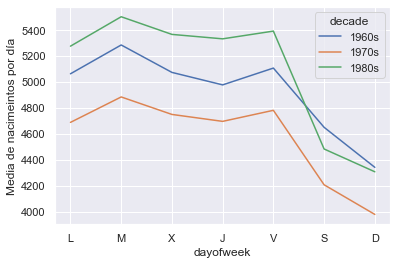

In [32]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['', 'L', 'M', 'X', 'J', 'V', 'S', 'D'])
plt.ylabel('Media de nacimeintos por día')
plt.show()

https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator 

In [38]:
births_by_date = births.pivot_table(
    'births', 
    [births.index.month, births.index.day], 
    aggfunc='mean'
)

In [39]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [42]:
births_by_date.index = [pd.datetime(2020, month, day) 
                        for (month, day) in births_by_date.index
                       ]

<ipython-input-42-8f83cb42a8a8>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2020, month, day)


In [43]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

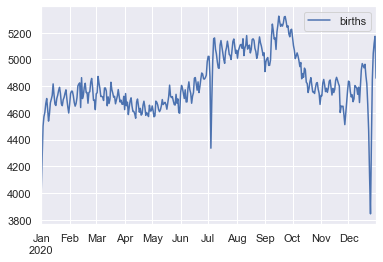

In [46]:
plt.figure(figsize=(12,4))
births_by_date.plot()
plt.show()